In [4]:
# import these first.
import copy
import getpass
import os
import json
from datetime import datetime
import logging
import requests
from requests.auth import HTTPBasicAuth
import random
import fdi.dataset.serializable
from fdi.dataset.product import Product
from fdi.dataset.metadata import Parameter, NumericParameter, MetaData
from fdi.dataset.finetime import FineTime1, utcobj
from fdi.dataset.dataset import ArrayDataset, TableDataset, Column
from fdi.pal.context import Context, MapContext
from fdi.pal.productref import ProductRef
from fdi.pal.query import MetaQuery, StorageQuery
from fdi.pal.poolmanager import PoolManager, DEFAULT_MEM_POOL
from fdi.pal.productstorage import ProductStorage
from fdi.dataset.serializable import serializeClassID
from fdi.dataset.deserialize import deserializeClassID
from pprint import pprint
auth_user = 'luchangfa'
auth_pass = '123456'
baseurl = 'http://192.168.1.13:5000/v0.6/httppool'
# disable debugging messages
logger = logging.getLogger('')
logger.setLevel(logging.WARNING)

In [3]:
# HTTP API TEST 
# POST
# SAVE A PRODUCT TO A NEW POOL
def httppool_post_pool(url, data, tag):
    header = {'tag': tag}
    x = requests.post(url, auth=HTTPBasicAuth(auth_user, auth_pass), data = data, headers=header)
#     print(x.text)


url = baseurl + '/yuxin_test1/fdi.dataset.product.Product/0'
x1 = Product(description='in store')
s1 = [('energy', [1, 4.4, 5.6], 'eV'), ('freq', [0, 43.2, 2E3], 'Hz')]
x1["Spectrum"] = TableDataset(data=s1)
data = serializeClassID(x1)
print(data)
print(type(data))
# httppool_post_pool(url, data, tag=None)
# teasyu@devdog:~/Documents/svom/fdi_client$ rm -r /data/demopool_teasyu/
# teasyu@devdog:~/Documents/svom/fdi_client$ ls /data/yuxin_test/
# classes.jsn  fdi.dataset.product.Product_0  tags.jsn  urns.jsn
# teasyu@devdog:~/Documents/svom/fdi_client$ cat /data/yuxin_test/urns.jsn  
# {"urn:http://192.168.1.11:5000/yuxin_test:fdi.dataset.product.Product:0"

Seriablizable: cls-->
<class 'fdi.dataset.serializable.SerializableEncoder'>
{"meta": {"_sets": {"data": {"description": {"description": "Description of this product", "value": "in store", "default": "UNKOWN", "valid": null, "typecode": "B", "classID": "StringParameter"}, "type": {"description": "Product Type identification. Fully qualified Python class name or CARD.", "value": "Product", "default": "BaseProduct", "valid": null, "typecode": "B", "classID": "StringParameter"}, "creator": {"description": "Generator of this product. Example name of institute, organization, person, software, special algorithm etc.", "value": "UNKOWN", "default": "UNKOWN", "valid": null, "typecode": "B", "classID": "StringParameter"}, "creationDate": {"description": "Creation date of this product", "value": {"tai": 0, "format": "%Y-%m-%dT%H:%M:%S.%f", "classID": "FineTime1"}, "default": 0, "valid": null, "typecode": "%Y-%m-%dT%H:%M:%S.%f", "classID": "DateParameter"}, "rootCause": {"description": "Reason of

In [75]:
import time
start = time.time()
part = []
creators = ['Todds', 'Cassandra', 'Jane', 'Owen', 'Julian']
instruments = ['fatman', 'herscherl', 'NASA', 'CNSC', 'SVOM']
for index,i in enumerate(creators):
    part_start = time.time()
    for j in range(0, 50):
        x = Product(description='desc ' + str(index), instrument=random.choice(instruments))
        x.creator = i
        s1 = [('energy', [1, 4.4, 5.6], 'eV'), ('freq', [0, 43.2, 2E3], 'Hz')]
        x["Spectrum"] = TableDataset(data=s1)
        data = serializeClassID(x)
        httppool_post_pool(url, data, tag=None)     
    part_end = time.time()
    part_diff = part_end - part_start
    part.append(part_diff)
end = time.time()
diff = end - start

/home/teasyu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


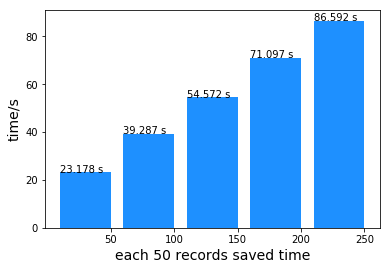

In [43]:
import matplotlib.pyplot as mp
import numpy as np
for i,x in enumerate(part):
    part[i] = round(x, 3)
mp.xlabel('each 50 records saved time', fontsize=14)
mp.ylabel('time/s', fontsize=14)
o = np.arange(5)
time_consume = np.array(part)
a = mp.bar(o-0.4, time_consume, color='dodgerblue', align='center')
mp.xticks(o, [50, 100, 150, 200, 250])
for i, x in enumerate(part):
    mp.text(i-0.8, x, "%s s" %x)
mp.show()

上图是存入250条数据进入一个空POOL里所需的时间， 总共花时间：4分31秒。 由上可知，一个pool内product越多，存入一个新的数据需要的时间越多。

每条数据存入磁盘大约2.6k， 样本参考：
```
{"meta": {"_sets": {"description": {"description": "Description of this product", "value": "in store", "unit": null, "type_": "string", "classID": "NumericParameter"}, "type": {"description": "Product Type identification. Fully qualified Python class name or CARD.", "value": "Product", "unit": null, "type_": "string", "classID": "NumericParameter"}, "creator": {"description": "Generator of this product. Example name of institute, organization, person, software, special algorithm etc.", "value": "UNKOWN", "unit": null, "type_": "string", "classID": "NumericParameter"}, "creationDate": {"description": "Creation date of this product", "value": {"tai": 0, "classID": "FineTime1"}, "listeners": [], "type_": "finetime", "classID": "Parameter"}, "rootCause": {"description": "Reason of this run of pipeline.", "value": "UNKOWN", "unit": null, "type_": "string", "classID": "NumericParameter"}, "version": {"description": "Version of product schema", "value": "0.5", "unit": null, "type_": "string", "classID": "NumericParameter"}, "startDate": {"description": "Nominal start time  of this product.", "value": {"tai": 0, "classID": "FineTime1"}, "listeners": [], "type_": "finetime", "classID": "Parameter"}, "endDate": {"description": "Nominal end time  of this product.", "value": {"tai": 0, "classID": "FineTime1"}, "listeners": [], "type_": "finetime", "classID": "Parameter"}, "instrument": {"description": "Instrument that generated data of this product", "value": "UNKOWN", "unit": null, "type_": "string", "classID": "NumericParameter"}, "modelName": {"description": "Model name of the instrument of this product", "value": "UNKOWN", "unit": null, "type_": "string", "classID": "NumericParameter"}, "mission": {"description": "Name of the mission.", "value": "_AGS", "unit": null, "type_": "string", "classID": "NumericParameter"}}, "listeners": [], "classID": "MetaData"}, "_sets": {"Spectrum": {"description": "UNKNOWN", "meta": {"_sets": {}, "listeners": [], "classID": "MetaData"}, "data": {"energy": {"description": "UNKNOWN", "meta": {"_sets": {}, "listeners": [], "classID": "MetaData"}, "data": [1, 4.4, 5.6], "classID": "Column", "unit": "eV"}, "freq": {"description": "UNKNOWN", "meta": {"_sets": {}, "listeners": [], "classID": "MetaData"}, "data": [0, 43.2, 2000.0], "classID": "Column", "unit": "Hz"}}, "classID": "TableDataset"}}, "history": {"description": "UNKNOWN", "HIST_SCRIPT": "", "PARAM_HISTORY": "", "TASK_HISTORY": "", "meta": {"_sets": {}, "listeners": [], "classID": "MetaData"}, "_sets": {}, "classID": "History"}, "listeners": [], "classID": "Product"}
```


In [54]:
import time
part = []
num = 255 * 15
creators = ['Todds', 'Cassandra', 'Jane', 'Owen', 'Julian']
instruments = ['fatman', 'herscherl', 'NASA', 'CNSC', 'SVOM']
energy = np.random.rand(num).tolist()
freq = np.random.rand(num).tolist()
start = time.time()
for index,i in enumerate(creators):
    part_start = time.time()
    for j in range(0, 1):
        x = Product(description='desc ' + str(index), instrument=random.choice(instruments))
        x.creator = i
        s1 = [('energy', energy, 'eV'), ('freq', freq, 'Hz')]
        x["Spectrum"] = TableDataset(data=s1)
        data = serializeClassID(x)
        httppool_post_pool(url, data, tag=None)     
    part_end = time.time()
    part_diff = part_end - part_start
    part.append(part_diff)
end = time.time()
diff = end - start

/home/teasyu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


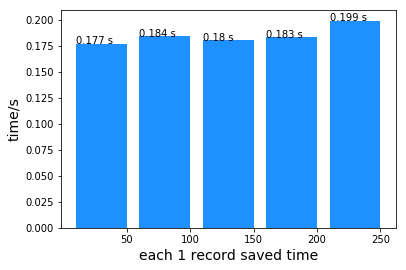

In [56]:
for i,x in enumerate(part):
    part[i] = round(x, 3)
mp.xlabel('each 1 record saved time', fontsize=14)
mp.ylabel('time/s', fontsize=14)
o = np.arange(5)
time_consume = np.array(part)
a = mp.bar(o-0.4, time_consume, color='dodgerblue', align='center')
mp.xticks(o, [50, 100, 150, 200, 250])
for i, x in enumerate(part):
    mp.text(i-0.8, x, "%s s" %x)
mp.show()

上图是存入5条数据进入一个空POOL里所需的时间, 总共花时：0.92秒， 每条数据大小154k。

In [60]:
part = []
num = 255 * 255
creators = ['Todds', 'Cassandra', 'Jane', 'Owen', 'Julian']
instruments = ['fatman', 'herscherl', 'NASA', 'CNSC', 'SVOM']
energy = np.random.rand(num).tolist()
freq = np.random.rand(num).tolist()
start = time.time()
for index,i in enumerate(creators):
    part_start = time.time()
    for j in range(0, 1):
        x = Product(description='desc ' + str(index), instrument=random.choice(instruments))
        x.creator = i
        s1 = [('energy', energy, 'eV'), ('freq', freq, 'Hz')]
        x["Spectrum"] = TableDataset(data=s1)
        data = serializeClassID(x)
        httppool_post_pool(url, data, tag=None)     
    part_end = time.time()
    part_diff = part_end - part_start
    part.append(part_diff)
end = time.time()
diff = end - start

/home/teasyu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


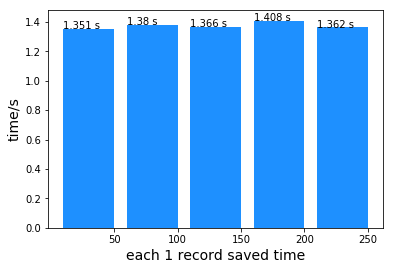

In [62]:
for i,x in enumerate(part):
    part[i] = round(x, 3)
mp.xlabel('each 1 record saved time', fontsize=14)
mp.ylabel('time/s', fontsize=14)
o = np.arange(5)
time_consume = np.array(part)
a = mp.bar(o-0.4, time_consume, color='dodgerblue', align='center')
mp.xticks(o, [50, 100, 150, 200, 250])
for i, x in enumerate(part):
    mp.text(i-0.8, x, "%s s" %x)
mp.show()

上图是存入5条数据进入一个空POOL里所需的时间, 总共花时：6.8秒， 每条数据大小2.6M，比起第一个存入数据大小为2.6K大了1000倍。 限制存入速度快慢的因素主要在于pool内的数据条目多少。

In [83]:
start = time.time()
part = []
creators = ['Todds', 'Cassandra', 'Jane', 'Owen', 'Julian']
instruments = ['fatman', 'herscherl', 'NASA', 'CNSC', 'SVOM']
for index,i in enumerate(creators):
    part_start = time.time()
    for j in range(0, 50):
        x = Product(description='desc ' + str(index), instrument=random.choice(instruments))
        x.creator = i
        s1 = [('energy', [1, 4.4, 5.6], 'eV'), ('freq', [0, 43.2, 2E3], 'Hz')]
        x["Spectrum"] = TableDataset(data=s1)
        data = serializeClassID(x)
        httppool_post_pool(url, data, tag=None)     
    part_end = time.time()
    part_diff = part_end - part_start
    part.append(part_diff)
end = time.time()
diff = end - start

/home/teasyu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


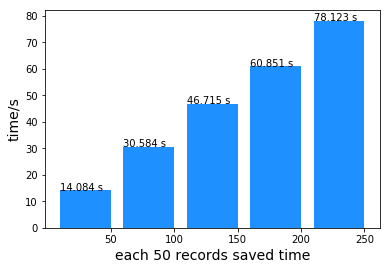

In [84]:
import matplotlib.pyplot as mp
import numpy as np
for i,x in enumerate(part):
    part[i] = round(x, 3)
mp.xlabel('each 50 records saved time', fontsize=14)
mp.ylabel('time/s', fontsize=14)
o = np.arange(5)
time_consume = np.array(part)
a = mp.bar(o-0.4, time_consume, color='dodgerblue', align='center')
mp.xticks(o, [50, 100, 150, 200, 250])
for i, x in enumerate(part):
    mp.text(i-0.8, x, "%s s" %x)
mp.show()

由于在数据条目多的情况下画的时间很多，我再做了一次测试，并加入更精确的计算。上图和第一个测试一样，是存入250条数据进入一个空POOL里所需的时间， 总共花时间：3分48秒。 
为了具体分析是那一部分所需时间最多，我把存入的过程分为了三步,精确计算使用的时间：
1. preSave: 读取ctu， 拷贝一份， 转化数据为ODict，计算最新的SN。
2. Save: 就是使用schematicSave产品的过程。
3. afterSave: 生成prdReference
以下是这部分时间使用的数据。

/home/teasyu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


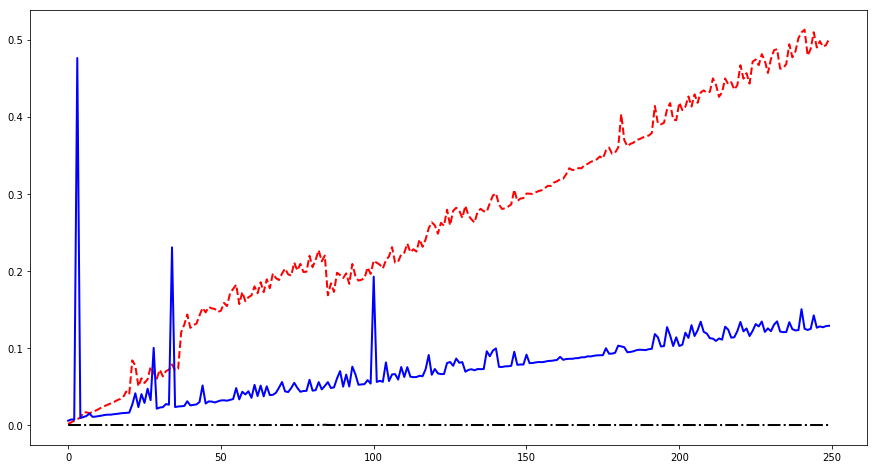

In [113]:
x = df.index
mp.figure(figsize=(15,8))
mp.plot(x,df.preSave,color='red',linewidth=2.0,linestyle='--')
mp.plot(x,df.Save,color='blue',linewidth=2.0)
mp.plot(x,df.afterSave,color='black',linewidth=2.0, linestyle='-.')
mp.show()


折线图里表示的是第N条数据在上述三个步骤中分别使用时间的对比图， 从一开始，三个步骤的时间花销接近， 最后一个步骤的时间花销可以视为不变。
第二步骤会随着数据增多缓慢增长， 但是第一步可以说是影响最明显的。

In [147]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_down = df.index.astype('float')/1000
model = model.fit(np.array(x_down).reshape((-1,1)), df.preSave)
print('===> preSave regression intercept:', model.intercept_)
print('===> preSave regression coef:', model.coef_)

model = model.fit(np.array(x_down).reshape((-1,1)), df.Save)
print('===> Save regression intercept:', model.intercept_)
print('===> Save regression coef:', model.coef_)

===> preSave regression intercept: 0.0283739614829
===> preSave regression coef: [ 1.89852896]
===> Save regression intercept: 0.0221097735447
===> Save regression coef: [ 0.43027319]


In [141]:
import pandas as pd

df = pd.read_csv('/data/yuxin_test/yuxin_test_timeconsume.csv')
df.drop(['index'],axis=1).describe()

,preSave,Save,afterSave
count,250.000000,250.000000,250.000000
mean,0.264741,0.075679,0.000293
std,0.138709,0.045941,0.000037
min,0.001586,0.005813,0.000266
25%,0.173764,0.044132,0.000277
50%,0.262972,0.075582,0.000282
75%,0.372400,0.101849,0.000289
max,0.512749,0.476063,0.000635


从图中和数据中可以看出preSave步骤是导致时间增长的主要因素，方差最大，最小值和最大值差了500倍， 在preSave的过程中，将数据转化成Object，计算sn是不变的， 主要在于读取ctu，copy元数据的步骤。 
* 改良：
可以考虑把ctu拆分来写，比如，从0-30 product的数据记录在ctu0-30.jsn的文件中，30-60放在下一个ctu30-60.jsn文件从而避免一次性读入大量数据。

In [154]:
# HTTP API TEST 
# GET
def httppool_get_pstore(poolpath):
    x = requests.get(baseurl + poolpath, auth=HTTPBasicAuth(auth_user, auth_pass))
#     o = deserializeClassID(x.text)
    print(x.text)
    
    
def httppool_delete_pstore(poolpath):
    x =  requests.delete(baseurl + poolpath, auth=HTTPBasicAuth(auth_user, auth_pass))
    print(x.text)
# poolpath = '/yuxin_test/hk'
# poolpath = '/yuxin_test/fdi.dataset.product.Product/1'
poolpath = ''
# poolpath = '/yuxin_test/hk/urns'
# poolpath = '/yuxin_test'
x=httppool_get_pstore(poolpath)
#httppool_delete_pstore(poolpath)

['http://192.168.1.13:5000/pool_default', 'http://192.168.1.13:5000/yuxin_test', 'http://192.168.1.13:5000/', 'http://192.168.1.13:5000/post_test_pool']


In [111]:
### TEST FOR HTTPCLIENTPOOL
# metatadata will be saved at /tmp
# product will be saved by server at /data
demopoolpath = '/client_test_pool'
demopool = 'http://192.168.1.9:5000' + demopoolpath
PoolManager.getPool(DEFAULT_MEM_POOL).removeAll()
PoolManager.removeAll()
pstore = ProductStorage(pool=demopool)
# urn = 'urn:http://192.168.1.11:5000/yuxin_test1:fdi.dataset.product.Product:5'
# pstore.getPool('http://192.168.1.11:5000/yuxin_test1').loadProduct(urn)
# pstore.save(x1)
#pstore.getPools()

READ HK FROM REMOTE===>poolurl: http://192.168.1.9:5000/client_test_pool


ERROR:root:Error in HK reading from server http://192.168.1.9:5000/client_test_pool


Exception: Error in HK reading from server http://192.168.1.9:5000/client_test_pool

In [ ]:
creators = ['Todds', 'Cassandra', 'Jane', 'Owen', 'Julian', 'Maurice']
instruments = ['fatman', 'herscherl', 'NASA', 'CNSC', 'SVOM']
for index,i in enumerate(creators):
    x = Product(description='desc ' + str(index), instrument=random.choice(instruments))
    x.creator = i
    s1 = [('energy', [1, 4.4, 5.6], 'eV'), ('freq', [0, 43.2, 2E3], 'Hz')]
    x["Spectrum"] = TableDataset(data=s1)
    pstore.save(x, geturnobjs=True, tag=i)

In [ ]:
q = MetaQuery(Product, 'm["creator"] == "Todds"')
# search all pools registered on pstore
res = pstore.select(q)
len(res)

In [ ]:
urn = 'urn:http://192.168.1.9:5000/client_test_pool:fdi.dataset.product.Product:0'
x = pstore.getPool('http://192.168.1.9:5000/client_test_pool').loadProduct(urn)
# pstore.getPools()
x.creator

In [ ]:
# pstore.getPool('http://192.168.1.11:5000/yuxin_test').removeAll()
# pstore.getPool('http://192.168.1.8:5000/yuxin_test').remove(urn)
pstore.getPool('http://192.168.1.8:5000/yuxin_test')

In [ ]:
from fdi.dataset.odict import ODict
# pstore.register('http://192.168.1.8:5000/yuxin_test')
pstore.getPool('http://192.168.1.8:5000/yuxin_test').readHK()[0] == ODict()